In [125]:
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient
connection = MongoClient()

db = connection.movie_dataset

# Trova l'ID corrispondente a un attore

In [126]:
people = db.people
actor = pd.DataFrame(people.find({'name': 'Johnny Depp'}))
actor_id = actor['_id'].values[0]
actor_id

85

# Trova i film di quell'attore

In [127]:
cast = db.cast
actor_films = pd.DataFrame(cast.find({'person_id': actor_id.astype('float')}))
actor_films

,_id,cast_id,character,credit_id,order,person_id,movie_id
0,5f510ba0a9e826701e40bb4b,11.0,Gene Watson,52fe4334c3a36847f80421dd,0.0,85.0,2086.0
1,5f510ba2a9e826701e40d145,1.0,Don Juan deMarco,52fe4320c3a36847f803c5f7,0.0,85.0,1909.0
2,5f510ba2a9e826701e40d212,5.0,Ed Wood,52fe424cc3a36847f801385f,0.0,85.0,522.0
3,5f510ba2a9e826701e40d912,13.0,Gilbert Grape,52fe4301c3a36847f80336bf,0.0,85.0,1587.0
4,5f510ba4a9e826701e410979,22.0,William Blake,52fe428dc3a36847f8027a59,0.0,85.0,922.0
...,...,...,...,...,...,...,...
64,5f510c59a9e826701e4c71b8,75.0,Gellert Grindelwald,58192a7392514133a200179e,7.0,85.0,259316.0
65,5f510c5aa9e826701e4c8a21,0.0,James 'Whitey' Bulger,5330579ec3a3685fbb006b13,0.0,85.0,261023.0
66,5f510c81a9e826701e4e4cb6,0.0,Guy Lapointe,540ad77b0e0a262b3a00213b,14.0,85.0,290825.0
67,5f510c86a9e826701e4e8af9,3.0,Mad Hatter,52fe4eb5c3a36847f82a2d39,0.0,85.0,241259.0


# Restituisci metadata e ordina per anno d'uscita

In [128]:
actor_films_id = actor_films['movie_id']

metadata = db.metadata
df_metadata = pd.DataFrame(metadata.find({}))
actor_metadata = df_metadata[df_metadata['_id'].isin(actor_films_id)]
actor_metadata = actor_metadata.sort_values('release_date')
actor_metadata

,_id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1299,377,False,8581.0,1800000,[27],en,A Nightmare on Elm Street,Teenagers in a small town are dropping like fl...,13.6947,/sXFlyjfWv544uKOJmPd2vVsaFm9.jpg,...,1984-11-14,25504513.0,91.0,[en],Released,"If Nancy Doesn't Wake Up Screaming, She Won't ...",A Nightmare on Elm Street,False,7.2,1212.0
10279,17824,False,NaN,0,[35],en,Private Resort,Jack (Depp) and his buddy Ben (Morrow) check i...,4.96666,/6mV9mMl0vXqr2blt4e5RvjZjbCb.jpg,...,1985-05-03,331816.0,82.0,"[en, de]",Released,Spend a weekend with no reservations!,Private Resort,False,5.5,54.0
1058,792,False,NaN,6000000,"[18, 10752, 28]",en,Platoon,"As a young and naive recruit in Vietnam, Chris...",18.207,/sYPOQI57JVNmjiLI3KeZ5KA8O9i.jpg,...,1986-12-18,138530565.0,120.0,"[en, vi]",Released,The first casualty of war is innocence.,Platoon,False,7.5,1236.0
8935,9768,False,NaN,11000000,"[35, 10402]",en,Cry-Baby,A prim and proper schoolgirl goes against her ...,8.29038,/wuvick59KjsA6LCM7KWLO4fmwXj.jpg,...,1990-04-05,8266343.0,85.0,[en],Released,Good girls want him bad. Bad girls want him wo...,Cry-Baby,False,6.4,289.0
2177,162,False,NaN,20000000,"[14, 18, 10749]",en,Edward Scissorhands,A small suburban town receives a visit from a ...,17.6122,/kgLTB53HinftRRwhft7yrUOclDC.jpg,...,1990-12-05,53000000.0,105.0,[en],Released,His scars run deep.,Edward Scissorhands,False,7.5,3731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39744,382079,False,NaN,0,[35],en,Donald Trump's The Art of the Deal: The Movie,"Donald Trump has it all. Money, power, respect...",2.058059,/7lmQIJt7IKjSlii9w6Ybjx7Cnhz.jpg,...,2016-02-10,0.0,50.0,[en],Released,NaN,Donald Trump's The Art of the Deal: The Movie,False,5.7,29.0
38700,241259,False,261307.0,170000000,"[10751, 14]",en,Alice Through the Looking Glass,"In the sequel to Tim Burton's ""Alice in Wonder...",14.61608,/7rfucKCjV01OEsGr9grXa34Aywd.jpg,...,2016-05-25,299370084.0,113.0,[en],Released,It's time for a little madness.,Alice Through the Looking Glass,False,6.5,1782.0
37710,290825,False,NaN,5000000,"[35, 14, 27, 53]",en,Yoga Hosers,Two teenage yoga enthusiasts team up with a le...,7.550395,/t9K1uUCJsbrFGKYivSH1JBPfvyc.jpg,...,2016-07-08,0.0,88.0,"[en, fr, de]",Released,Do your 'wurst...,Yoga Hosers,False,4.7,107.0
30378,259316,False,435259.0,180000000,"[12, 10751, 14]",en,Fantastic Beasts and Where to Find Them,"In 1926, Newt Scamander arrives at the Magical...",41.0514,/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg,...,2016-11-16,809342332.0,133.0,[en],Released,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,False,7.2,5612.0


# Grafici per media valutazione film, popolarità e incassi

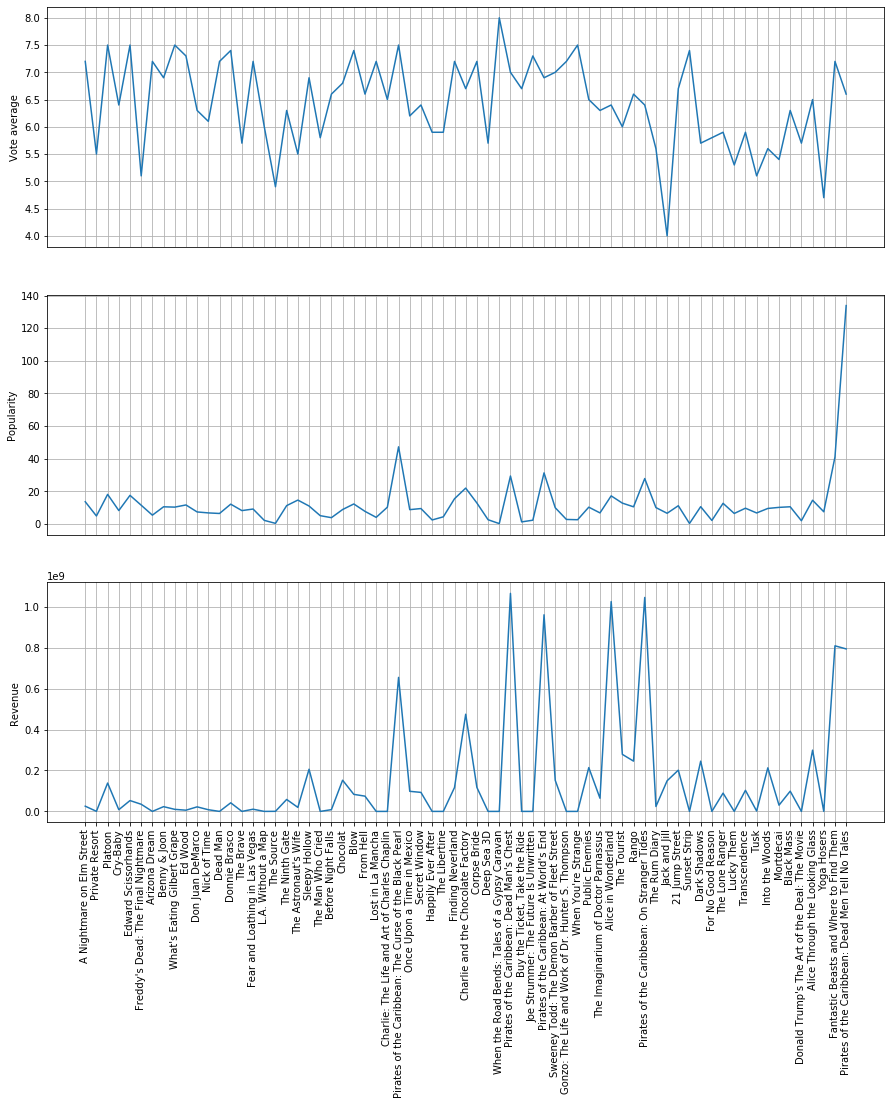

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

plt.subplot(3, 1, 1)
plt.grid()
plt.plot(actor_metadata['title'], actor_metadata['vote_average'])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Vote average')

plt.subplot(3, 1, 2)
plt.grid()
plt.plot(actor_metadata['title'], actor_metadata['popularity'])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Popularity')

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(actor_metadata['title'], actor_metadata['revenue'])
plt.xticks(rotation=90)
plt.ylabel('Revenue')

plt.show()

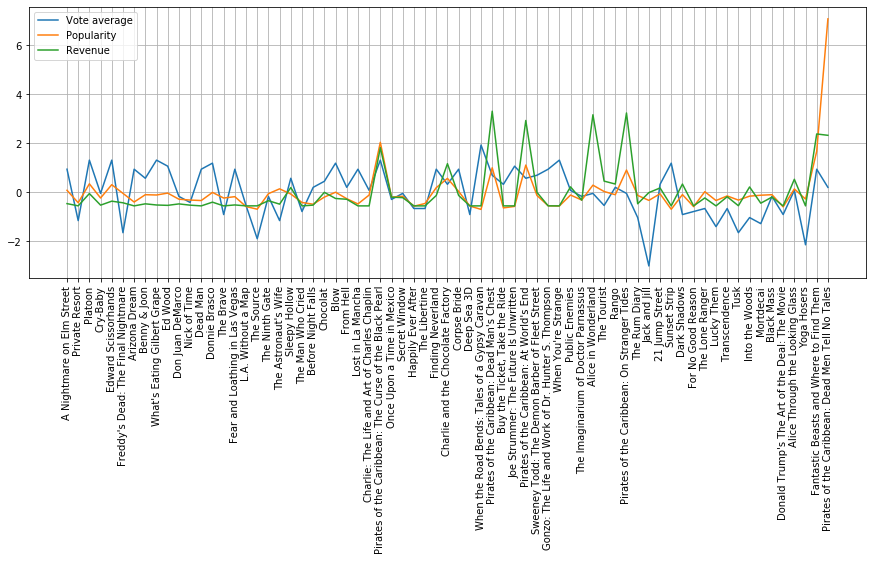

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.grid()
plt.plot(actor_metadata['title'], (actor_metadata['vote_average'] - actor_metadata['vote_average'].mean())
         / actor_metadata['vote_average'].std())
plt.plot(actor_metadata['title'], (actor_metadata['popularity'].astype('float') -
                                   actor_metadata['popularity'].astype('float').mean())
         / actor_metadata['popularity'].astype('float').std())
plt.plot(actor_metadata['title'], (actor_metadata['revenue'] - actor_metadata['revenue'].mean())
         / actor_metadata['revenue'].std())
plt.legend(['Vote average', 'Popularity', 'Revenue'])
plt.xticks(rotation=90)

plt.show()

In [131]:
connection.close()